In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from researchlib.single_import import *

In [5]:
train_loader = VisionDataset(vision.CIFAR10, batch_size=256, train=True)
test_loader = VisionDataset(vision.CIFAR10, batch_size=256, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Model
model = builder([
    SENet18(input_dim=3),
    nn.LogSoftmax(-1),
])

# Learning
runner = Runner(model, train_loader, test_loader, optimizer='adam', loss_fn='nll')

In [7]:
runner.init_model()

In [8]:
runner.fit(2, 1e-3, metrics=[Correlation(difference=False, categorical=True)])

  Epochs    train_loss    train_acc   train_correlation   val_loss      val_acc    val_correlation
    1*        1.6390        0.4324        0.3275        2.2429        0.3946        0.1754    


    2         0.9186        0.6743        0.6597        0.7852        0.7287        0.7221    



{'loss': 0.7851686403155327} tensor(0.7287, device='cuda:0')


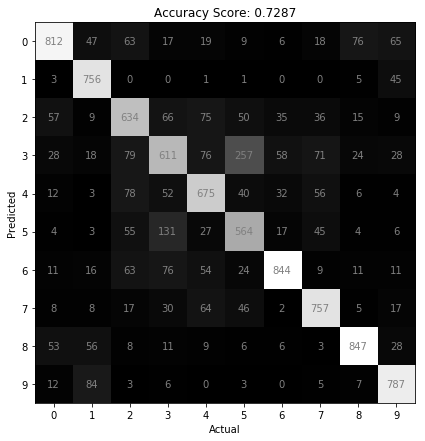

In [9]:
runner.validate(metrics=[ConfusionMatrix(plot=True, classes=10)])

In [ ]:
runner.history(plot=False)